In [1]:
# Classification for Stock 20190516~
# Bayes, KNN, Decision Tree, Random Forest, SVM

In [2]:
# import packages

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics, preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 20190509 df=pd.read_csv('2882_17v1.csv')

# 20190516
df=pd.read_csv('2882_17af.csv')

In [4]:
# check data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 23 columns):
日期           246 non-null int64
1d           246 non-null int64
5d           246 non-null int64
開盤           246 non-null float64
最高           246 non-null float64
最低           246 non-null float64
收盤           246 non-null float64
成交值千元        246 non-null float64
外資買賣超金額      246 non-null float64
投信買賣超金額      246 non-null float64
自營商買賣超金額     246 non-null float64
融資餘額張數       246 non-null int64
融券餘額張數       246 non-null int64
開盤2          246 non-null float64
最高2          246 non-null float64
最低2          246 non-null float64
收盤2          246 non-null float64
成交值千元2       246 non-null float64
外資買賣超金額2     246 non-null float64
投信買賣超金額2     246 non-null float64
自營商買賣超金額2    246 non-null float64
融資餘額張數2      246 non-null int64
融券餘額張數2      246 non-null int64
dtypes: float64(16), int64(7)
memory usage: 44.3 KB


In [5]:
# verify data

df.head()

,日期,1d,5d,開盤,最高,最低,收盤,成交值千元,外資買賣超金額,投信買賣超金額,...,開盤2,最高2,最低2,收盤2,成交值千元2,外資買賣超金額2,投信買賣超金額2,自營商買賣超金額2,融資餘額張數2,融券餘額張數2
0,20170103,0,1,48.10,48.20,47.70,48.00,293195.63,-12480.00,-1440.00,...,2313.6100,2323.2400,2275.2900,2304.0000,8.596368e+10,1.557504e+08,2073600.00,1.268499e+09,469458889,20657025
1,20170104,1,1,48.35,48.35,47.75,47.90,461387.88,8552.35,-8574.10,...,2337.7225,2337.7225,2280.0625,2294.4100,2.128790e+11,7.314269e+07,73515190.81,1.623433e+08,464962969,19554084
2,20170105,1,1,47.90,48.40,47.90,48.40,708032.56,44164.52,968.00,...,2294.4100,2342.5600,2294.4100,2342.5600,5.013100e+11,1.950505e+09,937024.00,2.808788e+09,480354889,19368801
3,20170106,1,0,48.80,48.80,48.15,48.75,850128.00,324610.16,5898.75,...,2381.4400,2381.4400,2318.4225,2376.5625,7.227180e+11,1.053720e+11,34795251.56,1.605805e+09,458174025,19784704
4,20170109,1,0,48.75,49.20,48.75,49.00,738486.00,276888.41,-4900.00,...,2376.5625,2420.6400,2376.5625,2401.0000,5.453620e+11,7.666719e+10,24010000.00,1.457025e+09,448592400,21473956


In [6]:
# normalization

def normalize(df):
    norm = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
    return norm
norm = normalize(df[['開盤','最高','最低','收盤','成交值千元','外資買賣超金額','投信買賣超金額','自營商買賣超金額','融資餘額張數','融券餘額張數']])
#2 norm = normalize(df[['開盤','最高','最低','收盤','成交值千元','外資買賣超金額','投信買賣超金額','自營商買賣超金額','融資餘額張數','融券餘額張數','開盤2','最高2','最低2','收盤2','成交值千元2','外資買賣超金額2','投信買賣超金額2','自營商買賣超金額2','融資餘額張數2','融券餘額張數2']])
#3 norm = normalize(df[['開盤','最高','最低','收盤']])

In [7]:
# chcek after normalization

norm.head()

,開盤,最高,最低,收盤,成交值千元,外資買賣超金額,投信買賣超金額,自營商買賣超金額,融資餘額張數,融券餘額張數
0,-0.148823,-0.157672,-0.163186,-0.154957,-0.107591,-0.026568,-0.002674,-0.063062,0.210706,0.669391
1,-0.119753,-0.141714,-0.157198,-0.166320,-0.073108,-0.015600,-0.014578,-0.027036,0.202059,0.644077
2,-0.172079,-0.136395,-0.139234,-0.109502,-0.022539,0.002969,0.001344,0.076501,0.231492,0.639755
3,-0.067428,-0.093842,-0.109294,-0.069729,0.006594,0.149206,0.009572,-0.070081,0.188921,0.649428
4,-0.073242,-0.051289,-0.037437,-0.041320,-0.016296,0.124322,-0.008447,-0.067086,0.170214,0.687707


In [8]:
# import another visualization package seaborn

import seaborn as sns
sns.set()

C:\Users\Derek_Huang\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


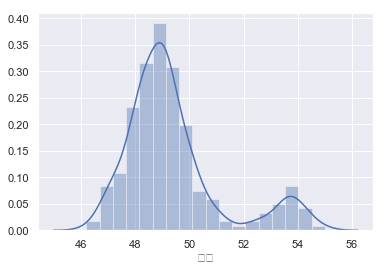

In [9]:
sns.distplot(df['收盤']) 

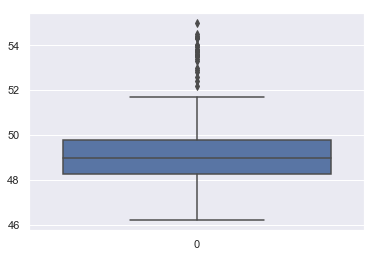

In [10]:
# centralization

sns.boxplot(data = df['收盤'])

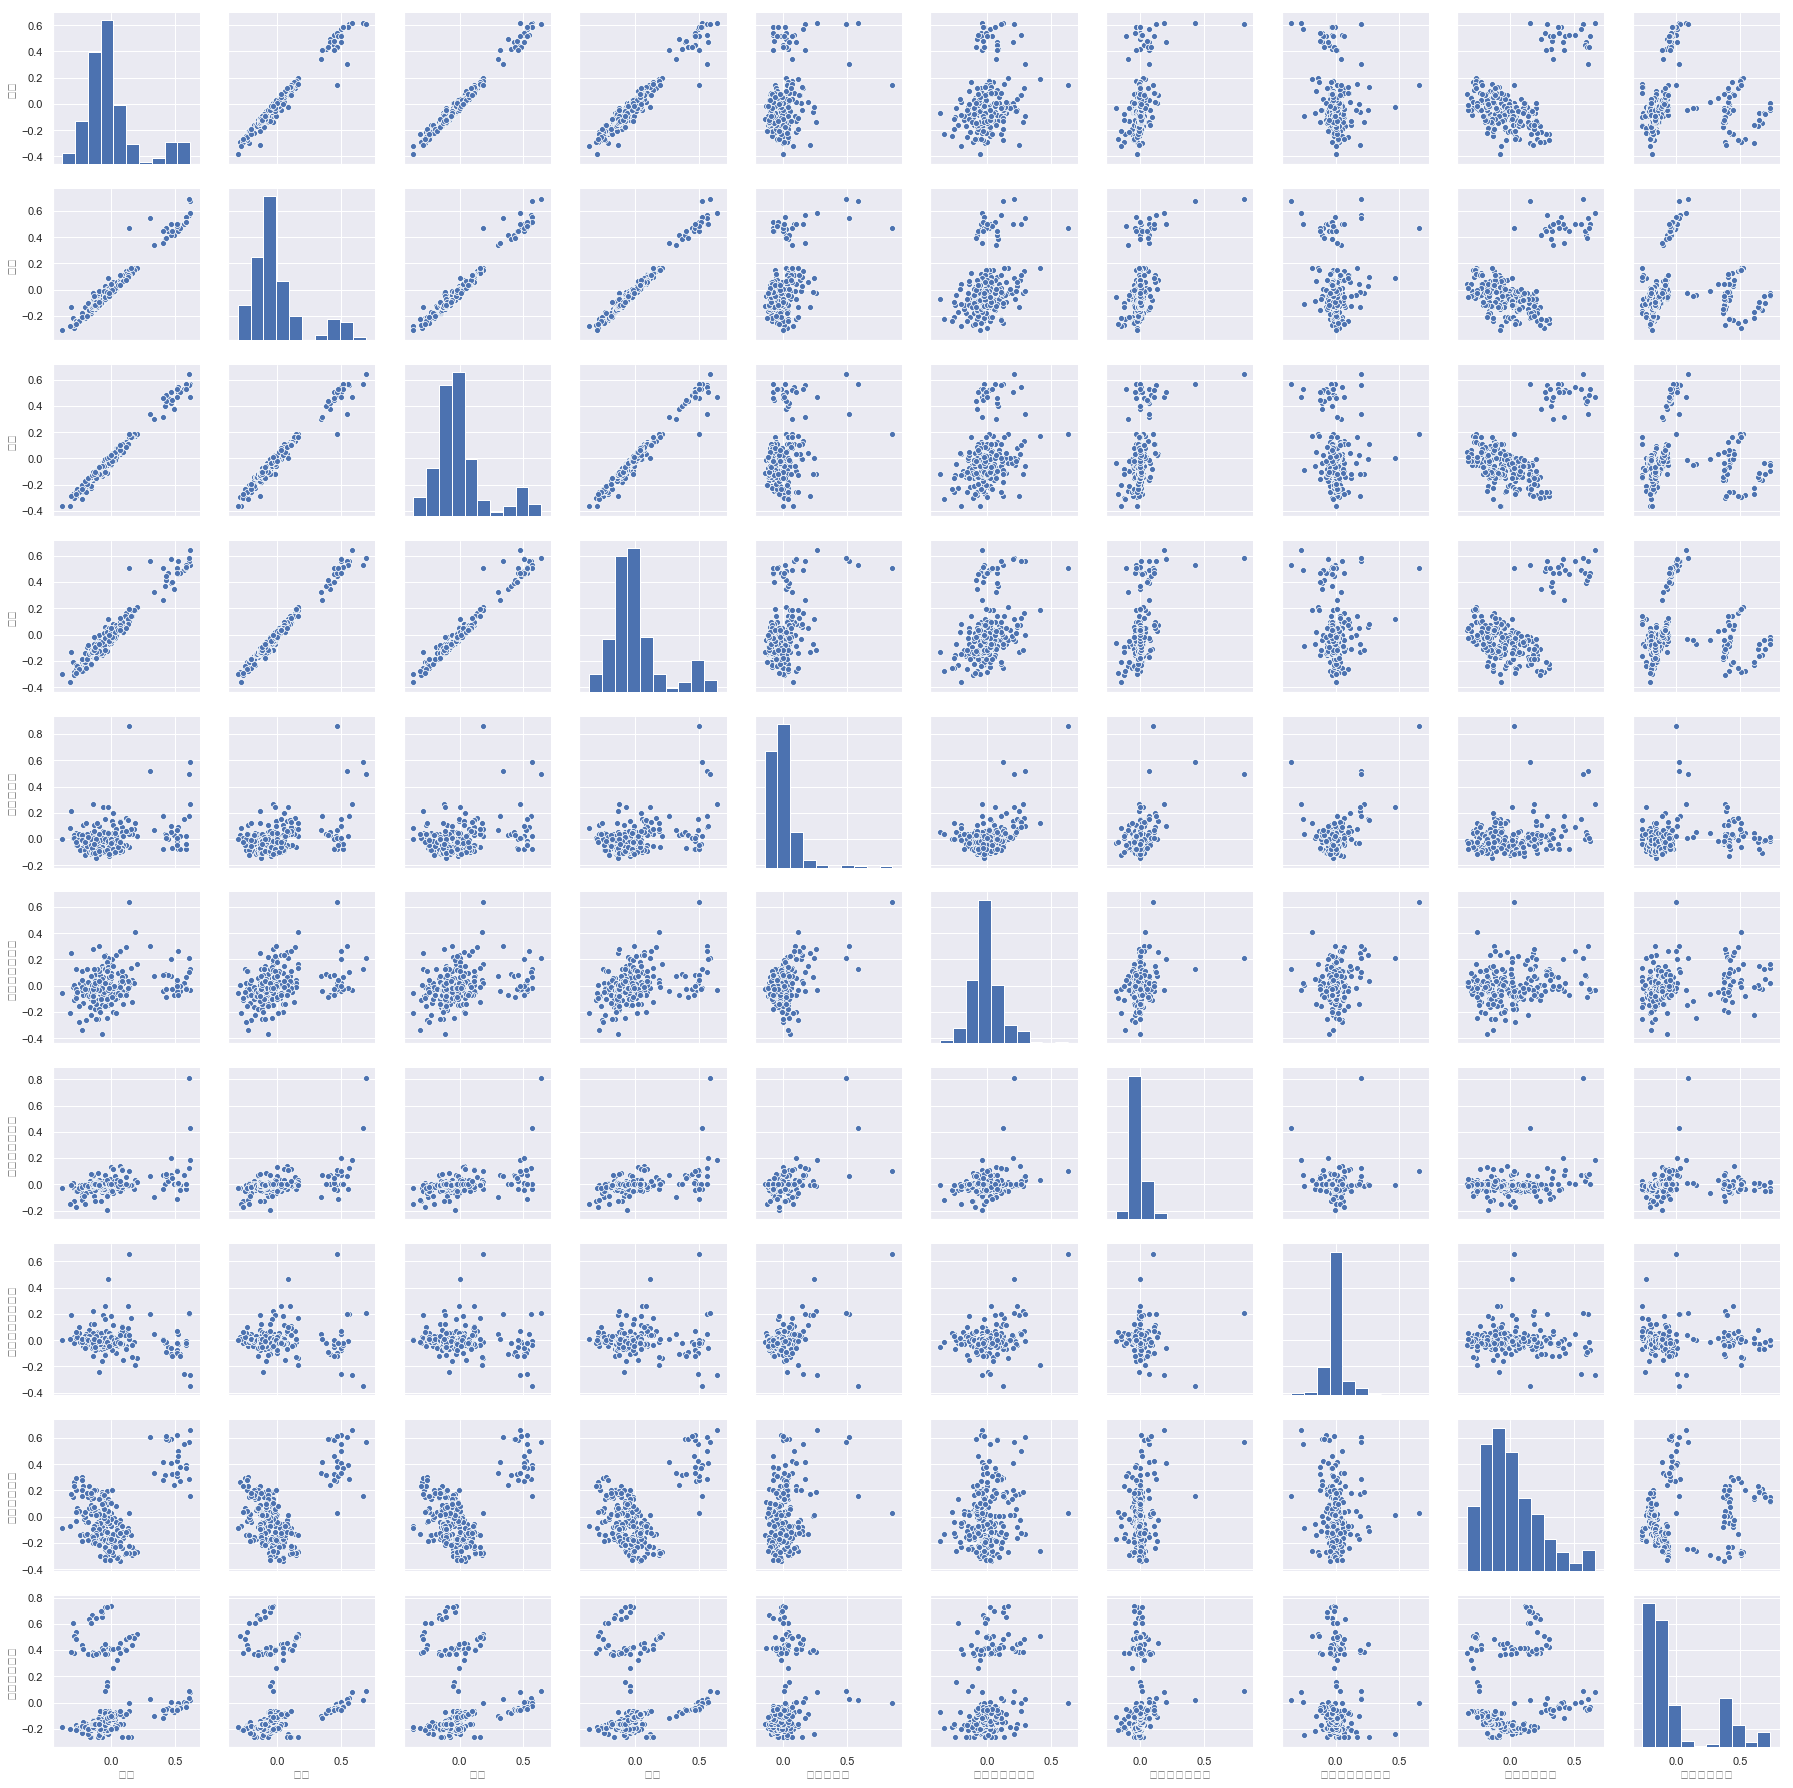

In [11]:
# correlation chart all

plt = sns.pairplot(data = norm)

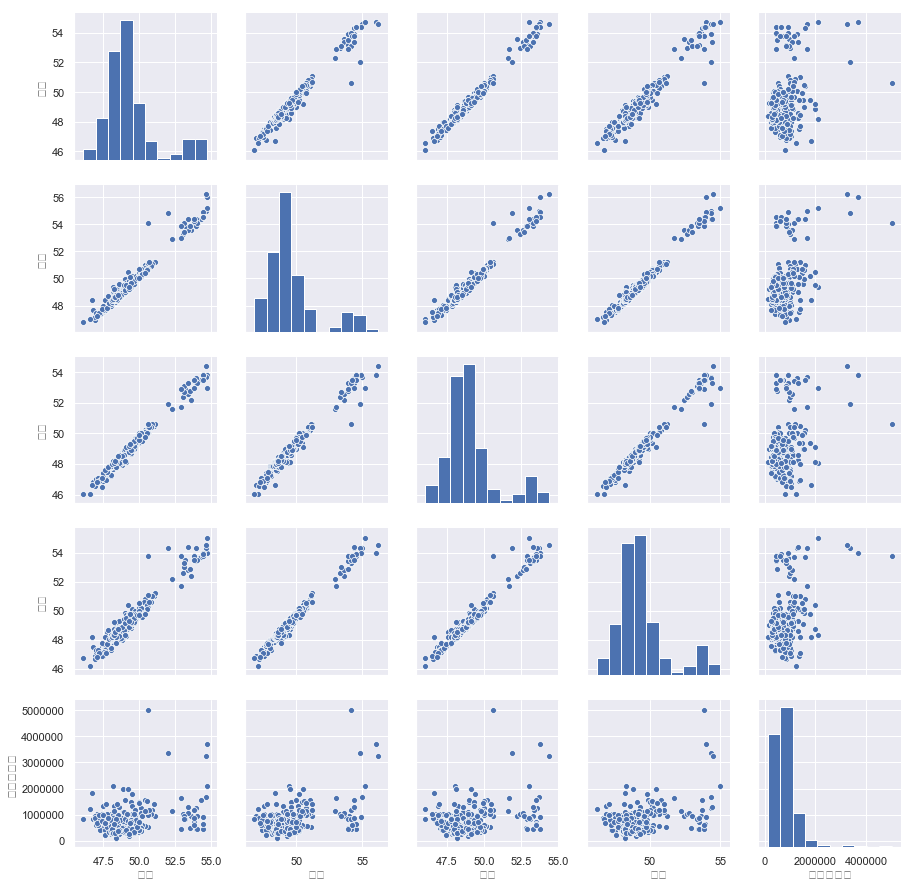

In [12]:
# correlation chart partial

columns = ['開盤','最高','最低','收盤','成交值千元']
sns.pairplot(data = df[columns])

In [13]:
# check corrleation coefficient

corr = norm.corr()
corr

,開盤,最高,最低,收盤,成交值千元,外資買賣超金額,投信買賣超金額,自營商買賣超金額,融資餘額張數,融券餘額張數
開盤,1.000000,0.979329,0.989568,0.967333,0.305274,0.224978,0.433987,-0.151062,0.454785,0.013820
最高,0.979329,1.000000,0.981576,0.989395,0.435090,0.322601,0.485237,-0.034691,0.475496,0.022738
最低,0.989568,0.981576,1.000000,0.981005,0.293443,0.270728,0.444634,-0.112518,0.434605,-0.007837
收盤,0.967333,0.989395,0.981005,1.000000,0.394960,0.368720,0.454566,-0.025035,0.451190,0.016603
成交值千元,0.305274,0.435090,0.293443,0.394960,1.000000,0.454940,0.496633,0.383909,0.274881,0.192915
外資買賣超金額,0.224978,0.322601,0.270728,0.368720,0.454940,1.000000,0.276347,0.306283,0.157816,0.265972
投信買賣超金額,0.433987,0.485237,0.444634,0.454566,0.496633,0.276347,1.000000,0.015173,0.236220,0.058245
自營商買賣超金額,-0.151062,-0.034691,-0.112518,-0.025035,0.383909,0.306283,0.015173,1.000000,-0.062935,-0.026808
融資餘額張數,0.454785,0.475496,0.434605,0.451190,0.274881,0.157816,0.236220,-0.062935,1.000000,0.162721
融券餘額張數,0.013820,0.022738,-0.007837,0.016603,0.192915,0.265972,0.058245,-0.026808,0.162721,1.000000


In [14]:
# select OHLC four columns~

In [15]:
# and normalize
def normalize(df):
    norm = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
    return norm
norm = normalize(df[['開盤','最高','最低','收盤']])

In [16]:
norm.head()

,開盤,最高,最低,收盤
0,-0.148823,-0.157672,-0.163186,-0.154957
1,-0.119753,-0.141714,-0.157198,-0.166320
2,-0.172079,-0.136395,-0.139234,-0.109502
3,-0.067428,-0.093842,-0.109294,-0.069729
4,-0.073242,-0.051289,-0.037437,-0.041320


In [17]:
X_train, X_test, y_train, y_test = train_test_split(norm, df['1d'], test_size=0.3)

In [18]:
# check the training and testing data~
print(len(X_test))
print(len(X_train))
print(len(y_test))
print(len(y_train))

74
172
74
172


In [19]:
# KNN algorithm

# import algorithm from sklearn
from sklearn import neighbors

# build model
model2 = neighbors.KNeighborsClassifier(n_neighbors=3)
# try hyperparameter k =  3,13,23,33

# training data
model2.fit(X_train, y_train) 

# predict data
y_pred=model2.predict(X_test)

# print result
# print(y_pred)
# print(y_test)

In [20]:
# print report
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_pred,y_test))

[[22 17]
 [19 16]]
0.5135135135135135
              precision    recall  f1-score   support

           0       0.56      0.54      0.55        41
           1       0.46      0.48      0.47        33

   micro avg       0.51      0.51      0.51        74
   macro avg       0.51      0.51      0.51        74
weighted avg       0.52      0.51      0.51        74



In [21]:
# original data statistic original

print(sum(df['1d']))
print(len(df['1d']))
print(sum(df['1d'])/len(df['1d']))

109
246
0.44308943089430897


In [22]:

# Naive Bayes Algorithm


In [23]:
# Naive Bayes

# from sklearn.naive_bayes import GaussianNB
from sklearn import naive_bayes

# build model
model4 = naive_bayes.GaussianNB()

# training data
model4.fit(X_train, y_train) 

# predict
y_pred=model4.predict(X_test)

# print result
# print(y_pred)
# print(y_test)

In [24]:
# print report
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_pred,y_test))

[[21 18]
 [18 17]]
0.5135135135135135
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        39
           1       0.49      0.49      0.49        35

   micro avg       0.51      0.51      0.51        74
   macro avg       0.51      0.51      0.51        74
weighted avg       0.51      0.51      0.51        74



In [25]:

# Decision Tree Algorithm


In [26]:
# decision tree
from sklearn import tree

# build model
model1 = tree.DecisionTreeClassifier(criterion='gini', splitter='best')
#2 model1 = tree.DecisionTreeClassifier(criterion='gini', splitter='random')
#3 model1 = tree.DecisionTreeClassifier(criterion='entropy', splitter='best')
#4 model1 = tree.DecisionTreeClassifier(criterion='entropy', splitter='random')

# training data
model1.fit(X_train, y_train) 

# predict data
y_pred=model1.predict(X_test)

# print reulst
# print(y_pred)
# print(y_test)


In [27]:
# print report
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_pred,y_test))

[[24 15]
 [14 21]]
0.6081081081081081
              precision    recall  f1-score   support

           0       0.62      0.63      0.62        38
           1       0.60      0.58      0.59        36

   micro avg       0.61      0.61      0.61        74
   macro avg       0.61      0.61      0.61        74
weighted avg       0.61      0.61      0.61        74



In [1]:

# Random Forest (restart)


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, preprocessing


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('2882_17af.csv')

In [4]:
def normalize(df):
    norm = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
    # norm = df.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
    return norm
norm = normalize(df[['開盤','最高','最低','收盤','成交值千元','外資買賣超金額','投信買賣超金額','自營商買賣超金額','融資餘額張數','融券餘額張數']])
# norm = normalize(df[['開盤','最高','最低','收盤']])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(norm, df['1d'], test_size=0.3, random_state= 42, shuffle=True)

In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = -1)
# rf = RandomForestClassifier(n_estimator = 100, oob_score = TRUE, n_jobs = -1, random_state =42, max_features = "auto", min_samples_leaf = 50)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_pred,y_test)

0.5135135135135135

In [7]:
# print report
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_pred,y_test))

[[25 21]
 [15 13]]
0.5135135135135135
              precision    recall  f1-score   support

           0       0.54      0.62      0.58        40
           1       0.46      0.38      0.42        34

   micro avg       0.51      0.51      0.51        74
   macro avg       0.50      0.50      0.50        74
weighted avg       0.51      0.51      0.51        74



In [1]:

# SVM  (restart)


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics, svm, preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('2882_17af.csv')

In [4]:
def normalize(df):
    norm = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
    # norm = df.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
    return norm
norm = normalize(df[['開盤','最高','最低','收盤','成交值千元','外資買賣超金額','投信買賣超金額','自營商買賣超金額','融資餘額張數','融券餘額張數']])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(norm, df['1d'], test_size=0.3, random_state= 42, shuffle=True)

In [6]:
svc = svm.SVC()
svc_fit = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = metrics.accuracy_score(y_pred, y_test)
print(accuracy)

0.6216216216216216


C:\Users\Derek_Huang\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [7]:
# print report
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_pred,y_test))

[[46  0]
 [28  0]]
0.6216216216216216
              precision    recall  f1-score   support

           0       1.00      0.62      0.77        74
           1       0.00      0.00      0.00         0

   micro avg       0.62      0.62      0.62        74
   macro avg       0.50      0.31      0.38        74
weighted avg       1.00      0.62      0.77        74



C:\Users\Derek_Huang\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
